=== A2 & A3: Testing Activation Functions on AND Gate ===
Step: 130 epochs to converge
Final weights: [-0.1   0.1   0.05]
Bipolar_Step: 1000 epochs to converge
Final weights: [-0.1   0.1   0.05]
Sigmoid: 1000 epochs to converge
Final weights: [ 9.99101457  0.1981319  -0.75483714]
Relu: 1000 epochs to converge
Final weights: [ 2.67803548e-22 -2.32873270e+00 -2.87256355e+00]


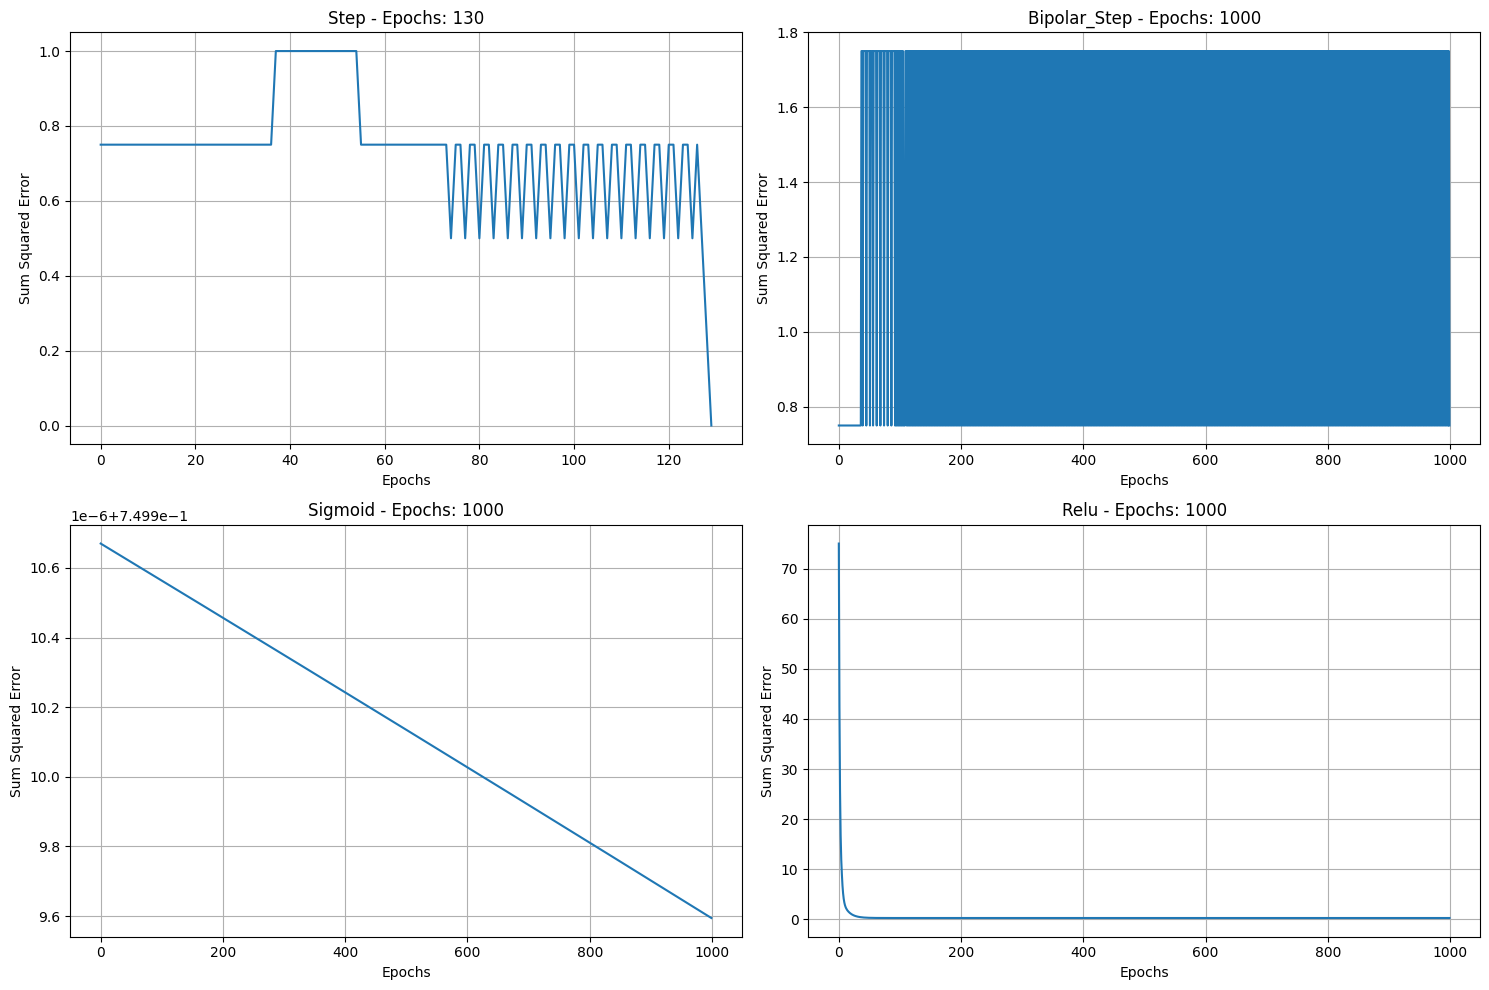


=== A4: Testing Different Learning Rates on AND Gate ===
Learning Rate 0.1: 68 epochs
Learning Rate 0.2: 37 epochs
Learning Rate 0.3: 23 epochs
Learning Rate 0.4: 23 epochs
Learning Rate 0.5: 19 epochs
Learning Rate 0.6: 19 epochs
Learning Rate 0.7: 15 epochs
Learning Rate 0.8: 14 epochs
Learning Rate 0.9: 13 epochs
Learning Rate 1.0: 12 epochs


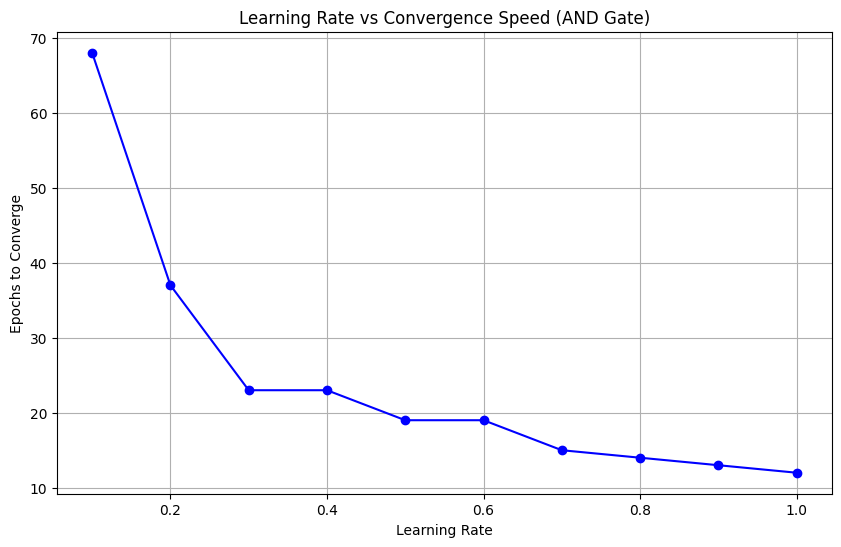


=== A5: Testing Activation Functions on XOR Gate ===
Step: Did not converge (1000 epochs)
Bipolar_Step: Did not converge (1000 epochs)
Sigmoid: Did not converge (1000 epochs)
Relu: Did not converge (1000 epochs)


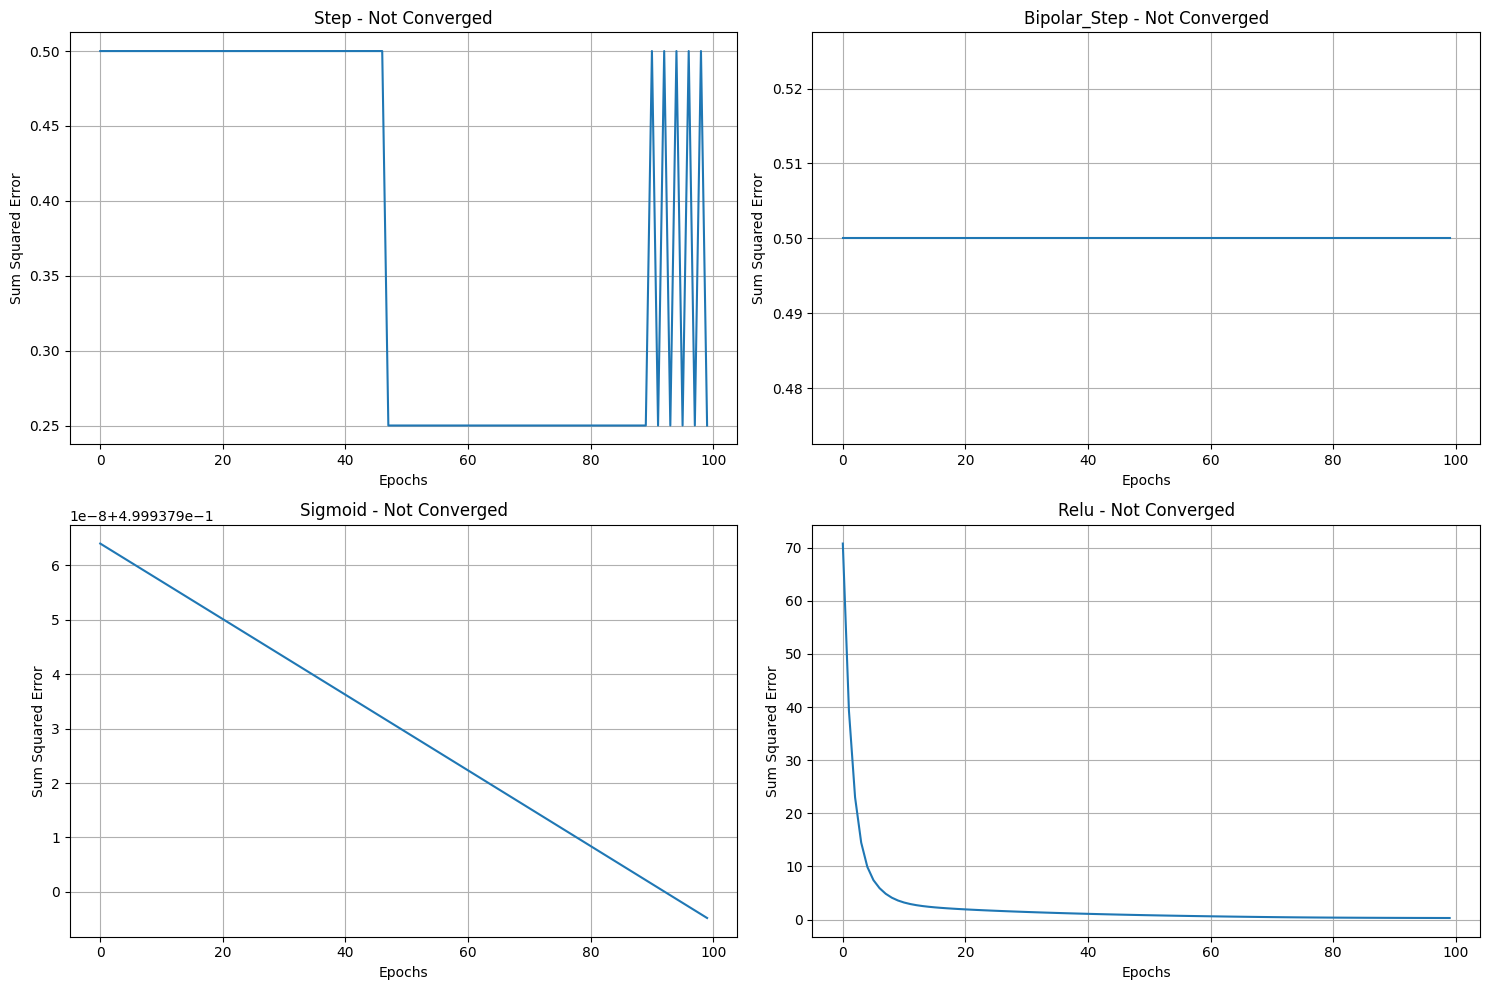

Note: XOR is not linearly separable, so single perceptron may not converge

=== A6: Customer Transaction Classification ===
Perceptron converged in 835 epochs
Final weights: [ 1.23803055 -0.00376306  2.79795752  0.16717931  3.01927134]
Accuracy: 100.00%

Prediction Results:
Customer | Actual | Predicted | Probability
---------------------------------------------
C_ 1      |   1    |     1     |   1.000
C_ 2      |   1    |     1     |   0.925
C_ 3      |   1    |     1     |   1.000
C_ 4      |   0    |     0     |   0.001
C_ 5      |   1    |     1     |   0.964
C_ 6      |   0    |     0     |   0.009
C_ 7      |   1    |     1     |   0.952
C_ 8      |   1    |     1     |   0.956
C_ 9      |   0    |     0     |   0.004
C_10      |   0    |     0     |   0.093

=== A7: Comparison with Pseudo-Inverse Solution ===
Pseudo-inverse accuracy: 100.00%
Perceptron accuracy: 100.00%
Pseudo-inverse weights: [ 0.6        -0.09436819  0.21713405 -0.01342766  0.23416864]
Perceptron weights: [ 1.

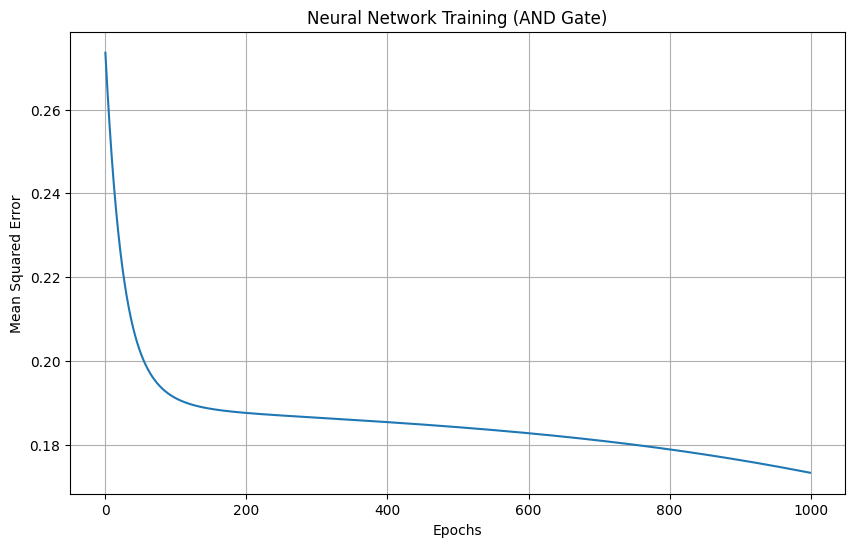


=== A9: Neural Network with Backpropagation (XOR Gate) ===
Neural network converged in 1000 epochs
Accuracy: 50.00%

Prediction Results:
Input | Target | Predicted | Probability
----------------------------------------
[0 0] |   0    |     1     |   0.501
[0 1] |   1    |     0     |   0.500
[1 0] |   1    |     1     |   0.500
[1 1] |   0    |     0     |   0.499


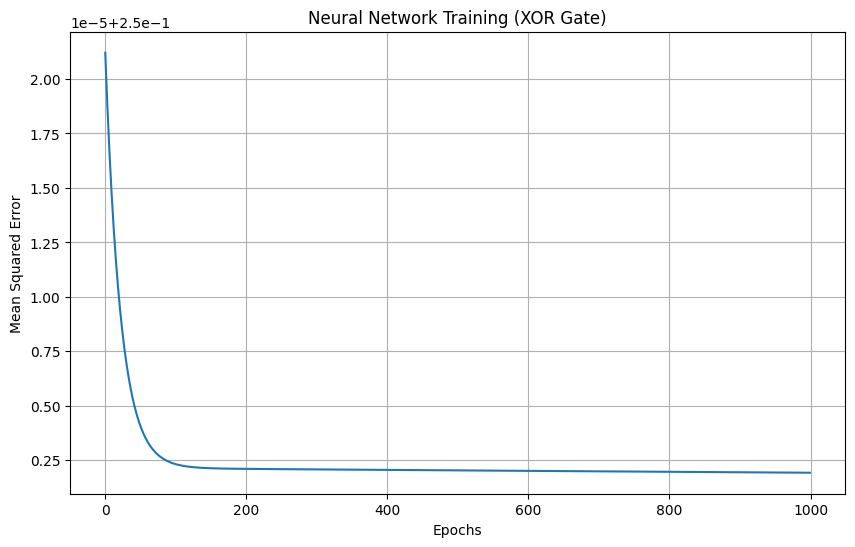


=== A10: Network with Two Output Nodes ===
Results for Two Output Network:
Input | Target    | Output 1 | Output 2
---------------------------------------------
[0 0] | [1, 0]     |  0.769   |  0.224
[0 1] | [1, 0]     |  0.746   |  0.258
[1 0] | [1, 0]     |  0.751   |  0.250
[1 1] | [0, 1]     |  0.728   |  0.283

=== A11: Scikit-learn MLPClassifier ===
AND Gate - Accuracy: 100.00%, Iterations: 551
XOR Gate - Accuracy: 50.00%, Iterations: 23

=== A12: MLPClassifier on Project Dataset ===
Target classes: ['RUM']
Dataset shape: (469, 24)
Number of classes: 1
Training accuracy: 1.000
Testing accuracy: 1.000
Iterations to converge: 90

Summary of key findings:
- Single perceptron can solve AND gate but struggles with XOR
- Neural networks with hidden layers can solve both AND and XOR
- Different activation functions show varying convergence rates
- Learning rate significantly affects convergence speed
- Scikit-learn MLPClassifier provides robust implementations


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# A1: Core Perceptron Components
class PerceptronComponents:
    """Core components for perceptron implementation"""
    
    @staticmethod
    def summation_unit(inputs, weights):
        """Summation unit - computes weighted sum"""
        return np.dot(inputs, weights)
    
    @staticmethod
    def step_activation(x):
        """Step activation function"""
        return 1 if x >= 0 else 0
    
    @staticmethod
    def bipolar_step_activation(x):
        """Bipolar step activation function"""
        return 1 if x >= 0 else -1
    
    @staticmethod
    def sigmoid_activation(x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clipped to prevent overflow
    
    @staticmethod
    def tanh_activation(x):
        """Tanh activation function"""
        return np.tanh(x)
    
    @staticmethod
    def relu_activation(x):
        """ReLU activation function"""
        return max(0, x)
    
    @staticmethod
    def leaky_relu_activation(x, alpha=0.01):
        """Leaky ReLU activation function"""
        return x if x > 0 else alpha * x
    
    @staticmethod
    def comparator_unit(predicted, actual):
        """Error calculation unit"""
        return actual - predicted

class Perceptron:
    """Custom Perceptron implementation"""
    
    def __init__(self, learning_rate=0.05, max_epochs=1000, tolerance=0.002, activation='step'):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.tolerance = tolerance
        self.activation_name = activation
        self.components = PerceptronComponents()
        
        # Set activation function
        self.activation_functions = {
            'step': self.components.step_activation,
            'bipolar_step': self.components.bipolar_step_activation,
            'sigmoid': self.components.sigmoid_activation,
            'tanh': self.components.tanh_activation,
            'relu': self.components.relu_activation,
            'leaky_relu': self.components.leaky_relu_activation
        }
        self.activation_func = self.activation_functions[activation]
        
        self.weights = None
        self.errors = []
        self.epochs_to_converge = 0
    
    def fit(self, X, y, initial_weights=None):
        """Train the perceptron"""
        # Add bias term
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        
        # Initialize weights
        if initial_weights is not None:
            self.weights = np.array(initial_weights)
        else:
            self.weights = np.random.randn(X_with_bias.shape[1]) * 0.1
        
        self.errors = []
        
        for epoch in range(self.max_epochs):
            total_error = 0
            
            for i in range(len(X)):
                # Forward pass
                net_input = self.components.summation_unit(X_with_bias[i], self.weights)
                prediction = self.activation_func(net_input)
                
                # Error calculation
                error = self.components.comparator_unit(prediction, y[i])
                
                # Weight update
                if self.activation_name in ['step', 'bipolar_step']:
                    # For step functions, use simple perceptron rule
                    self.weights += self.learning_rate * error * X_with_bias[i]
                else:
                    # For continuous functions, use derivative
                    if self.activation_name == 'sigmoid':
                        derivative = prediction * (1 - prediction)
                    elif self.activation_name == 'tanh':
                        derivative = 1 - prediction**2
                    elif self.activation_name == 'relu':
                        derivative = 1 if net_input > 0 else 0
                    elif self.activation_name == 'leaky_relu':
                        derivative = 1 if net_input > 0 else 0.01
                    
                    self.weights += self.learning_rate * error * derivative * X_with_bias[i]
                
                total_error += error**2
            
            # Calculate sum squared error
            sse = total_error / len(X)
            self.errors.append(sse)
            
            # Check convergence
            if sse <= self.tolerance:
                self.epochs_to_converge = epoch + 1
                break
        
        if self.epochs_to_converge == 0:
            self.epochs_to_converge = self.max_epochs
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        predictions = []
        
        for i in range(len(X)):
            net_input = self.components.summation_unit(X_with_bias[i], self.weights)
            prediction = self.activation_func(net_input)
            predictions.append(prediction)
        
        return np.array(predictions)

class MLPNetwork:
    """Multi-layer perceptron for backpropagation"""
    
    def __init__(self, hidden_size=2, learning_rate=0.05, max_epochs=1000, tolerance=0.002):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.tolerance = tolerance
        self.errors = []
        self.epochs_to_converge = 0
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def fit(self, X, y):
        # Initialize weights
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(X.shape[1] + 1, self.hidden_size) * 0.1
        self.weights_hidden_output = np.random.randn(self.hidden_size + 1, 1) * 0.1
        
        # Add bias to input
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        y = y.reshape(-1, 1)
        
        for epoch in range(self.max_epochs):
            # Forward pass
            hidden_input = np.dot(X_with_bias, self.weights_input_hidden)
            hidden_output = self.sigmoid(hidden_input)
            
            # Add bias to hidden layer
            hidden_output_with_bias = np.column_stack([np.ones(len(hidden_output)), hidden_output])
            
            output_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
            final_output = self.sigmoid(output_input)
            
            # Calculate error
            error = y - final_output
            total_error = np.mean(error**2)
            self.errors.append(total_error)
            
            if total_error <= self.tolerance:
                self.epochs_to_converge = epoch + 1
                break
            
            # Backward pass
            output_delta = error * self.sigmoid_derivative(final_output)
            
            hidden_error = output_delta.dot(self.weights_hidden_output[1:].T)
            hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)
            
            # Update weights
            self.weights_hidden_output += self.learning_rate * hidden_output_with_bias.T.dot(output_delta)
            self.weights_input_hidden += self.learning_rate * X_with_bias.T.dot(hidden_delta)
        
        if self.epochs_to_converge == 0:
            self.epochs_to_converge = self.max_epochs
        
        return self
    
    def predict(self, X):
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        hidden_input = np.dot(X_with_bias, self.weights_input_hidden)
        hidden_output = self.sigmoid(hidden_input)
        hidden_output_with_bias = np.column_stack([np.ones(len(hidden_output)), hidden_output])
        output_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
        return self.sigmoid(output_input)

# A2, A3: Test different activation functions on AND gate
def test_activation_functions_and_gate():
    """A2 & A3: Test different activation functions on AND gate"""
    print("=== A2 & A3: Testing Activation Functions on AND Gate ===")
    
    # AND gate data
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    
    # Initial weights as specified
    initial_weights = [10, 0.2, -0.75]  # W0 (bias), W1, W2
    
    activation_functions = ['step', 'bipolar_step', 'sigmoid', 'relu']
    results = {}
    
    plt.figure(figsize=(15, 10))
    
    for i, activation in enumerate(activation_functions):
        perceptron = Perceptron(learning_rate=0.05, activation=activation)
        perceptron.fit(X_and, y_and, initial_weights)
        
        results[activation] = {
            'epochs': perceptron.epochs_to_converge,
            'final_weights': perceptron.weights,
            'errors': perceptron.errors
        }
        
        # Plot error vs epochs
        plt.subplot(2, 2, i+1)
        plt.plot(perceptron.errors)
        plt.title(f'{activation.title()} - Epochs: {perceptron.epochs_to_converge}')
        plt.xlabel('Epochs')
        plt.ylabel('Sum Squared Error')
        plt.grid(True)
        
        print(f"{activation.title()}: {perceptron.epochs_to_converge} epochs to converge")
        print(f"Final weights: {perceptron.weights}")
    
    plt.tight_layout()
    plt.show()
    return results

# A4: Test different learning rates
def test_learning_rates_and_gate():
    """A4: Test different learning rates on AND gate"""
    print("\n=== A4: Testing Different Learning Rates on AND Gate ===")
    
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    initial_weights = [10, 0.2, -0.75]
    
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    epochs_results = []
    
    for lr in learning_rates:
        perceptron = Perceptron(learning_rate=lr, activation='step')
        perceptron.fit(X_and, y_and, initial_weights)
        epochs_results.append(perceptron.epochs_to_converge)
        print(f"Learning Rate {lr}: {perceptron.epochs_to_converge} epochs")
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, epochs_results, 'bo-')
    plt.xlabel('Learning Rate')
    plt.ylabel('Epochs to Converge')
    plt.title('Learning Rate vs Convergence Speed (AND Gate)')
    plt.grid(True)
    plt.show()
    
    return dict(zip(learning_rates, epochs_results))

# A5: Test XOR gate with different activation functions
def test_activation_functions_xor_gate():
    """A5: Test different activation functions on XOR gate"""
    print("\n=== A5: Testing Activation Functions on XOR Gate ===")
    
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    
    initial_weights = [10, 0.2, -0.75]
    activation_functions = ['step', 'bipolar_step', 'sigmoid', 'relu']
    results = {}
    
    plt.figure(figsize=(15, 10))
    
    for i, activation in enumerate(activation_functions):
        perceptron = Perceptron(learning_rate=0.05, activation=activation, max_epochs=1000)
        perceptron.fit(X_xor, y_xor, initial_weights)
        
        results[activation] = {
            'epochs': perceptron.epochs_to_converge,
            'final_weights': perceptron.weights,
            'converged': perceptron.epochs_to_converge < 1000
        }
        
        plt.subplot(2, 2, i+1)
        plt.plot(perceptron.errors[:min(100, len(perceptron.errors))])  # Plot first 100 epochs
        plt.title(f'{activation.title()} - {"Converged" if results[activation]["converged"] else "Not Converged"}')
        plt.xlabel('Epochs')
        plt.ylabel('Sum Squared Error')
        plt.grid(True)
        
        print(f"{activation.title()}: {'Converged' if results[activation]['converged'] else 'Did not converge'} ({perceptron.epochs_to_converge} epochs)")
    
    plt.tight_layout()
    plt.show()
    print("Note: XOR is not linearly separable, so single perceptron may not converge")
    return results

# A6: Customer transaction classification
def customer_transaction_classification():
    """A6: Classify customer transactions using perceptron"""
    print("\n=== A6: Customer Transaction Classification ===")
    
    # Customer data from the assignment
    customer_data = np.array([
        [20, 6, 2, 386, 1],  # C_1
        [16, 3, 6, 289, 1],  # C_2
        [27, 6, 2, 393, 1],  # C_3
        [19, 1, 2, 110, 0],  # C_4
        [24, 4, 2, 280, 1],  # C_5
        [22, 1, 5, 167, 0],  # C_6
        [15, 4, 2, 271, 1],  # C_7
        [18, 4, 2, 274, 1],  # C_8
        [21, 1, 4, 148, 0],  # C_9
        [16, 2, 4, 198, 0],  # C_10
    ])
    
    X_customer = customer_data[:, :4]  # Features: Candies, Mangoes, Milk Packets, Payment
    y_customer = customer_data[:, 4]   # Target: High Value Tx
    
    # Normalize features
    X_customer_norm = (X_customer - X_customer.mean(axis=0)) / X_customer.std(axis=0)
    
    # Train perceptron with sigmoid activation
    perceptron = Perceptron(learning_rate=0.1, activation='sigmoid', max_epochs=1000)
    perceptron.fit(X_customer_norm, y_customer)
    
    # Make predictions
    predictions = perceptron.predict(X_customer_norm)
    binary_predictions = (predictions > 0.5).astype(int)
    
    print(f"Perceptron converged in {perceptron.epochs_to_converge} epochs")
    print(f"Final weights: {perceptron.weights}")
    print(f"Accuracy: {np.mean(binary_predictions == y_customer):.2%}")
    
    # Display results
    print("\nPrediction Results:")
    print("Customer | Actual | Predicted | Probability")
    print("-" * 45)
    for i in range(len(y_customer)):
        print(f"C_{i+1:2d}      |   {y_customer[i]}    |     {binary_predictions[i]}     |   {predictions[i]:.3f}")
    
    return perceptron, X_customer_norm, y_customer

# A7: Compare with pseudo-inverse solution
def compare_with_pseudo_inverse(X_customer_norm, y_customer):
    """A7: Compare perceptron with pseudo-inverse solution"""
    print("\n=== A7: Comparison with Pseudo-Inverse Solution ===")
    
    # Add bias term for pseudo-inverse
    X_with_bias = np.column_stack([np.ones(len(X_customer_norm)), X_customer_norm])
    
    # Pseudo-inverse solution
    pseudo_weights = np.linalg.pinv(X_with_bias) @ y_customer
    pseudo_predictions = X_with_bias @ pseudo_weights
    pseudo_binary = (pseudo_predictions > 0.5).astype(int)
    pseudo_accuracy = np.mean(pseudo_binary == y_customer)
    
    # Retrain perceptron for comparison
    perceptron = Perceptron(learning_rate=0.1, activation='sigmoid')
    perceptron.fit(X_customer_norm, y_customer)
    perceptron_predictions = perceptron.predict(X_customer_norm)
    perceptron_binary = (perceptron_predictions > 0.5).astype(int)
    perceptron_accuracy = np.mean(perceptron_binary == y_customer)
    
    print(f"Pseudo-inverse accuracy: {pseudo_accuracy:.2%}")
    print(f"Perceptron accuracy: {perceptron_accuracy:.2%}")
    print(f"Pseudo-inverse weights: {pseudo_weights}")
    print(f"Perceptron weights: {perceptron.weights}")
    
    return pseudo_weights, perceptron.weights

# A8: Neural network with backpropagation for AND gate
def neural_network_and_gate():
    """A8: Neural network with backpropagation for AND gate"""
    print("\n=== A8: Neural Network with Backpropagation (AND Gate) ===")
    
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    
    mlp = MLPNetwork(hidden_size=2, learning_rate=0.05)
    mlp.fit(X_and, y_and)
    
    predictions = mlp.predict(X_and)
    binary_predictions = (predictions.flatten() > 0.5).astype(int)
    
    print(f"Neural network converged in {mlp.epochs_to_converge} epochs")
    print(f"Accuracy: {np.mean(binary_predictions == y_and):.2%}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.errors)
    plt.title('Neural Network Training (AND Gate)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()
    
    return mlp

# A9: Neural network with backpropagation for XOR gate
def neural_network_xor_gate():
    """A9: Neural network with backpropagation for XOR gate"""
    print("\n=== A9: Neural Network with Backpropagation (XOR Gate) ===")
    
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    
    mlp = MLPNetwork(hidden_size=3, learning_rate=0.05)  # More hidden units for XOR
    mlp.fit(X_xor, y_xor)
    
    predictions = mlp.predict(X_xor)
    binary_predictions = (predictions.flatten() > 0.5).astype(int)
    
    print(f"Neural network converged in {mlp.epochs_to_converge} epochs")
    print(f"Accuracy: {np.mean(binary_predictions == y_xor):.2%}")
    
    print("\nPrediction Results:")
    print("Input | Target | Predicted | Probability")
    print("-" * 40)
    for i in range(len(y_xor)):
        print(f"{X_xor[i]} |   {y_xor[i]}    |     {binary_predictions[i]}     |   {predictions[i][0]:.3f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.errors)
    plt.title('Neural Network Training (XOR Gate)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()
    
    return mlp

# A10: Two output nodes network
def two_output_network():
    """A10: Network with 2 output nodes"""
    print("\n=== A10: Network with Two Output Nodes ===")
    
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and_original = np.array([0, 0, 0, 1])
    
    # Convert to two output format: 0 -> [1,0], 1 -> [0,1]
    y_and_two_output = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])
    
    # Simple implementation using two separate networks
    network1 = MLPNetwork(hidden_size=2, learning_rate=0.05)
    network2 = MLPNetwork(hidden_size=2, learning_rate=0.05)
    
    network1.fit(X_and, y_and_two_output[:, 0])
    network2.fit(X_and, y_and_two_output[:, 1])
    
    pred1 = network1.predict(X_and).flatten()
    pred2 = network2.predict(X_and).flatten()
    
    print("Results for Two Output Network:")
    print("Input | Target    | Output 1 | Output 2")
    print("-" * 45)
    for i in range(len(X_and)):
        print(f"{X_and[i]} | [{y_and_two_output[i, 0]}, {y_and_two_output[i, 1]}]     |  {pred1[i]:.3f}   |  {pred2[i]:.3f}")
    
    return network1, network2

# A11: Scikit-learn MLPClassifier
def sklearn_mlp_gates():
    """A11: Using scikit-learn MLPClassifier for gates"""
    print("\n=== A11: Scikit-learn MLPClassifier ===")
    
    # AND gate
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    
    mlp_and = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, learning_rate_init=0.05, 
                           activation='logistic', solver='sgd', random_state=42)
    mlp_and.fit(X_and, y_and)
    and_predictions = mlp_and.predict(X_and)
    and_accuracy = np.mean(and_predictions == y_and)
    
    print(f"AND Gate - Accuracy: {and_accuracy:.2%}, Iterations: {mlp_and.n_iter_}")
    
    # XOR gate
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    
    mlp_xor = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, learning_rate_init=0.05,
                           activation='logistic', solver='sgd', random_state=42)
    mlp_xor.fit(X_xor, y_xor)
    xor_predictions = mlp_xor.predict(X_xor)
    xor_accuracy = np.mean(xor_predictions == y_xor)
    
    print(f"XOR Gate - Accuracy: {xor_accuracy:.2%}, Iterations: {mlp_xor.n_iter_}")
    
    return mlp_and, mlp_xor

# A12: MLPClassifier on project dataset
def sklearn_mlp_project_data():
    """A12: Apply MLPClassifier to project dataset"""
    print("\n=== A12: MLPClassifier on Project Dataset ===")
    
    try:
        # Load the dataset
        df = pd.read_csv('20231225_dfall_obs_data_and_spectral_features_revision1_n469.csv')
        
        # Select relevant features (using some spectral features and acoustic measurements)
        feature_columns = ['sprsMed', 'sprsMbw', 'sprsEqbw', 'sprsMc'] + [f'V{i}' for i in range(1, 21)]
        
        # Use a categorical column as target (e.g., Call_Type or Context)
        if 'Call_Type' in df.columns:
            target_col = 'Call_Type'
        elif 'Context' in df.columns:
            target_col = 'Context'
        else:
            # Create a binary target based on a numerical feature
            target_col = 'binary_target'
            df[target_col] = (df['Distance'] > df['Distance'].median()).astype(int)
        
        # Remove rows with missing values
        df_clean = df[feature_columns + [target_col]].dropna()
        
        if len(df_clean) == 0:
            print("No clean data available after removing missing values")
            return None
        
        X = df_clean[feature_columns].values
        y = df_clean[target_col].values
        
        # Handle categorical target
        if y.dtype == 'object':
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            y = le.fit_transform(y)
            print(f"Target classes: {le.classes_}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train MLP
        mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, 
                           learning_rate_init=0.001, random_state=42)
        mlp.fit(X_train_scaled, y_train)
        
        # Evaluate
        train_accuracy = mlp.score(X_train_scaled, y_train)
        test_accuracy = mlp.score(X_test_scaled, y_test)
        
        print(f"Dataset shape: {X.shape}")
        print(f"Number of classes: {len(np.unique(y))}")
        print(f"Training accuracy: {train_accuracy:.3f}")
        print(f"Testing accuracy: {test_accuracy:.3f}")
        print(f"Iterations to converge: {mlp.n_iter_}")
        
        return mlp, scaler
        
    except Exception as e:
        print(f"Error processing project dataset: {e}")
        return None

# Main execution
if __name__ == "__main__":
    
    # Execute all assignments
    a2_a3_results = test_activation_functions_and_gate()
    a4_results = test_learning_rates_and_gate()
    a5_results = test_activation_functions_xor_gate()
    perceptron_customer, X_norm, y_norm = customer_transaction_classification()
    pseudo_weights, perceptron_weights = compare_with_pseudo_inverse(X_norm, y_norm)
    mlp_and = neural_network_and_gate()
    mlp_xor = neural_network_xor_gate()
    net1, net2 = two_output_network()
    mlp_and_sklearn, mlp_xor_sklearn = sklearn_mlp_gates()
    project_results = sklearn_mlp_project_data()
    
    print("\n" + "=" * 60)
    print("Summary of key findings:")
    print("- Single perceptron can solve AND gate but struggles with XOR")
    print("- Neural networks with hidden layers can solve both AND and XOR")
    print("- Different activation functions show varying convergence rates")
    print("- Learning rate significantly affects convergence speed")
    print("- Scikit-learn MLPClassifier provides robust implementations")